#EXPERIMENT 4: DATA WRANGLING AND DATA VISUALIZATION

##PROBLEM 1

In [95]:
import pandas as pd

In [96]:
eceboarddata = pd.read_excel('board2.xlsx')
eceboarddata

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


In [97]:
#Filename: Instru = [“Name”, “GEAS”, “Electronics >70”]; where track is constant as Instrumentation and hometown Luzon
Instru = eceboarddata.loc[(eceboarddata ['Track'] == 'Instrumentation')
        & (eceboarddata ['Hometown'] == 'Luzon')
        & (eceboarddata ['Electronics'] > 70), ['Name', 'GEAS', 'Electronics']]
Instru

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


In [98]:
#Compute for the average
eceboarddata['Average'] = (eceboarddata['Math'] + eceboarddata['Electronics'] + eceboarddata['GEAS'] + eceboarddata['Communication']) / 4

In [99]:
#Filename: Mindy = [ “Name”, “Track”, “Electronics”, “Average >=55”]; where hometown is constant as Mindanao and gender Female
Mindy = eceboarddata.loc[(eceboarddata['Hometown'] == 'Mindanao') 
        & (eceboarddata['Gender'] == 'Female')
        & (eceboarddata['Average'] > 54)][['Name', 'Track', 'Electronics', 'Average']]
Mindy

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


##PROBLEM 2

In [101]:
import matplotlib.pyplot as plt

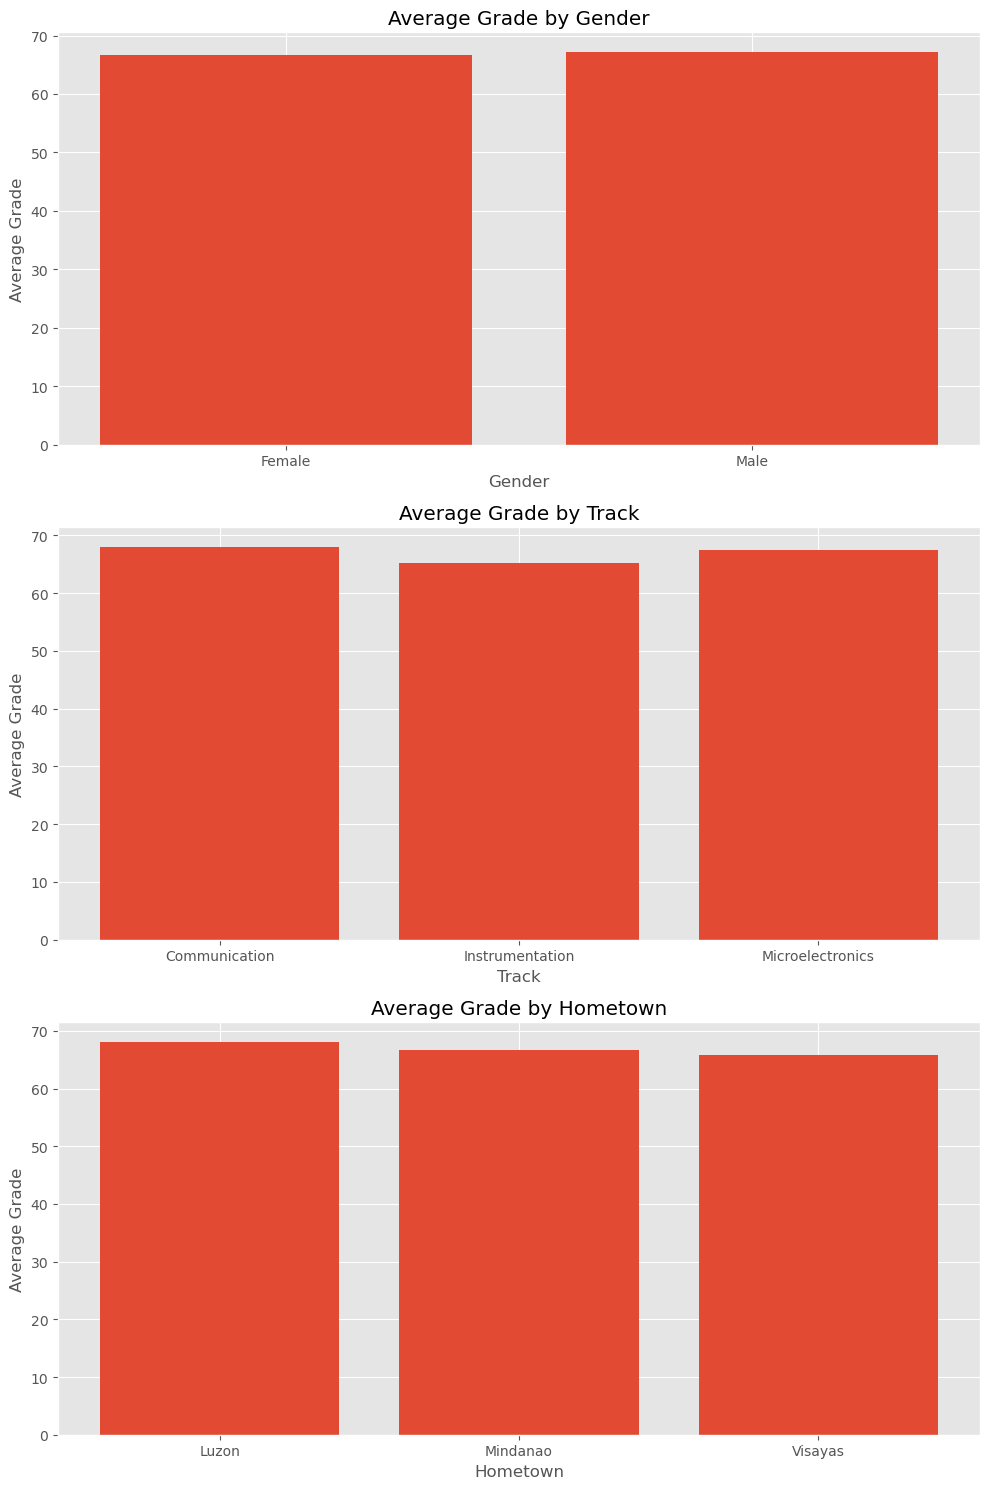

In [102]:
#Create a visualization that shows how the different features contribute to the average grade. 
#Compute the average grade by Gender, Track, and Hometown
average_by_gender = eceboarddata.groupby('Gender')['Average'].mean()
average_by_track = eceboarddata.groupby('Track')['Average'].mean()
average_by_hometown = eceboarddata.groupby('Hometown')['Average'].mean()

#Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#Plot the grades by Gender
axes[0].bar(average_by_gender.index, average_by_gender.values)
axes[0].set_title('Average Grade by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Grade')

# Plot the grades by Track
axes[1].bar(average_by_track.index, average_by_track.values)
axes[1].set_title('Average Grade by Track')
axes[1].set_xlabel('Track')
axes[1].set_ylabel('Average Grade')

# Plot the grades by Hometown
axes[2].bar(average_by_hometown.index, average_by_hometown.values)
axes[2].set_title('Average Grade by Hometown')
axes[2].set_xlabel('Hometown')
axes[2].set_ylabel('Average Grade')

plt.tight_layout()
plt.show()